# Downscaled DTR

This notebook is for exploring downscaled daily temperature range data. We are specifically interested in DTR from GFDL-ESM4, because of the physically implausible tasmin values derived from tasmax - dtr, but other models exhibit some suspicious cold values as well.

In [1]:
# Set ERA5_DIR, CMIP6_DIR, and ADJ_DIR environment variables to your paths
# export ERA5_DIR=/path/to/cmip6_4km_downscaling/era5_zarr
# export CMIP6_DIR=/path/to/cmip6_4km_downscaling/cmip6_zarr
# export ADJ_DIR=/path/to/cmip6_4km_downscaling/adjusted

# Pass parameters via command line arguments like so, for example:
# papermill downscaled_dtr.ipynb output.ipynb -p models 'EC-Earth3-Veg' -p scenarios 'historical ssp370 ssp585'
models = "EC-Earth3-Veg"
scenarios = "historical ssp370 ssp585"

In [2]:
# Parameters
models = "EC-Earth3-Veg"
scenarios = "historical ssp370 ssp585"


In [3]:
import os
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Markdown

import warnings
warnings.filterwarnings('ignore')

models = models.split(" ")
scenarios = scenarios.split(" ")

ref_dir = Path(
    os.getenv("ERA5_DIR", "/beegfs/CMIP6/crstephenson/cmip6_4km_downscaling/era5_zarr")
)

cmip6_dir = Path(
    os.getenv("CMIP6_DIR", "/beegfs/CMIP6/crstephenson/cmip6_4km_downscaling/cmip6_zarr")
)

adj_dir = Path(
    os.getenv("ADJ_DIR", "/beegfs/CMIP6/crstephenson/cmip6_4km_downscaling/adjusted")
)

In [4]:
def plot_dtr(era5_ds, cmip6_ds, adj_ds, model, scenario):
    cmip6_dtr = cmip6_ds["dtr"]
    cmip6_dtr.attrs["units"] = "°C"

    adj_dtr = adj_ds["dtr"]
    adj_dtr.attrs["units"] = "°C"

    fig, ax = plt.subplots(1, 3, figsize=(21, 6))

    # Compute min values for both datasets
    cmip6_dtr_min = cmip6_dtr.min("time")
    adj_dtr_min = adj_dtr.min("time")
    era5_min = era5_ds["dtr"].min("time")

    vmin = min(float(cmip6_dtr_min.min().values), float(adj_dtr_min.min().values), float(era5_min.min().values))
    vmax = max(float(cmip6_dtr_min.max().values), float(adj_dtr_min.max().values), float(era5_min.max().values))

    cmip6_dtr_min.plot(ax=ax[0], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[0].set_title(f"Minimum DTR ({model} Original)")

    # Plot minimum DTR from downscaled data
    adj_dtr_min.plot(ax=ax[1], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[1].set_title(f"Minimum DTR ({model} Downscaled)")

    # Plot minimum DTR from ERA5 reference data
    era5_min.plot(ax=ax[2], cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax[2].set_title("Minimum DTR (ERA5)")

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=(21, 6))

    # Compute mean values for both datasets
    cmip6_dtr_mean = cmip6_dtr.mean("time")
    adj_dtr_mean = adj_dtr.mean("time")
    era5_mean = era5_ds["dtr"].mean("time")

    # Find global min and max for consistent color scale
    vmin = min(float(cmip6_dtr_mean.min().values), float(adj_dtr_mean.min().values), float(era5_mean.min().values))
    vmax = max(float(cmip6_dtr_mean.max().values), float(adj_dtr_mean.max().values), float(era5_mean.max().values))

    cmip6_dtr_mean.plot(ax=ax[0], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[0].set_title(f"Mean DTR ({model} Original)")

    # Plot mean DTR from downscaled data
    adj_dtr_mean.plot(ax=ax[1], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[1].set_title(f"Mean DTR ({model} Downscaled)")

    # Plot mean DTR from ERA5 reference data
    era5_mean.plot(ax=ax[2], cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax[2].set_title("Mean DTR (ERA5)")

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=(21, 6))

    # Compute max values for both datasets
    cmip6_dtr_max = cmip6_dtr.max("time")
    adj_dtr_max = adj_dtr.max("time")
    era5_max = era5_ds["dtr"].max("time")

    # Find global min and max for consistent color scale
    vmin = min(float(cmip6_dtr_max.min().values), float(adj_dtr_max.min().values), float(era5_max.min().values))
    vmax = max(float(cmip6_dtr_max.max().values), float(adj_dtr_max.max().values), float(era5_max.max().values))

    cmip6_dtr_max.plot(ax=ax[0], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[0].set_title(f"Maximum DTR ({model} Original)")

    # Plot maximum DTR from downscaled data
    adj_dtr_max.plot(ax=ax[1], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[1].set_title(f"Maximum DTR ({model} Downscaled)")

    # Plot maximum DTR from ERA5 reference data
    era5_max.plot(ax=ax[2], cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax[2].set_title("Maximum DTR (ERA5)")

    plt.tight_layout()
    plt.show()

    era5_ds["dtr"].max().values

    fig, ax = plt.subplots(1, 3, figsize=(21, 6))

    # Compute max values for both datasets
    cmip6_masked = cmip6_dtr.where(cmip6_dtr <= 70)
    cmip6_dtr_max = cmip6_masked.max("time")
    adj_dtr_masked = adj_dtr.where(adj_dtr <= 70)
    adj_dtr_max = adj_dtr_masked.max("time")
    era5_max = era5_ds["dtr"].max("time")

    # Find global min and max for consistent color scale
    vmin = min(float(cmip6_dtr_max.min().values), float(adj_dtr_max.min().values), float(era5_max.min().values))
    vmax = max(float(cmip6_dtr_max.max().values), float(adj_dtr_max.max().values), float(era5_max.max().values))

    cmip6_dtr_max.plot(ax=ax[0], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[0].set_title("Maximum DTR (GFDL-ESM4 Original), DTR restricted to 70°C")

    # Plot maximum DTR from downscaled data
    adj_dtr_max.plot(ax=ax[1], cmap="coolwarm", x='x', y='y', vmin=vmin, vmax=vmax)
    ax[1].set_title("Maximum DTR (GFDL-ESM4 Downscaled), DTR restricted to 70°C")

    # Plot maximum DTR from ERA5 reference data
    era5_max.plot(ax=ax[2], cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax[2].set_title("Maximum DTR (ERA5) (maximum ERA5 DTR is 66°C)")

    plt.tight_layout()
    plt.show()

# EC-Earth3-Veg

## EC-Earth3-Veg, historical

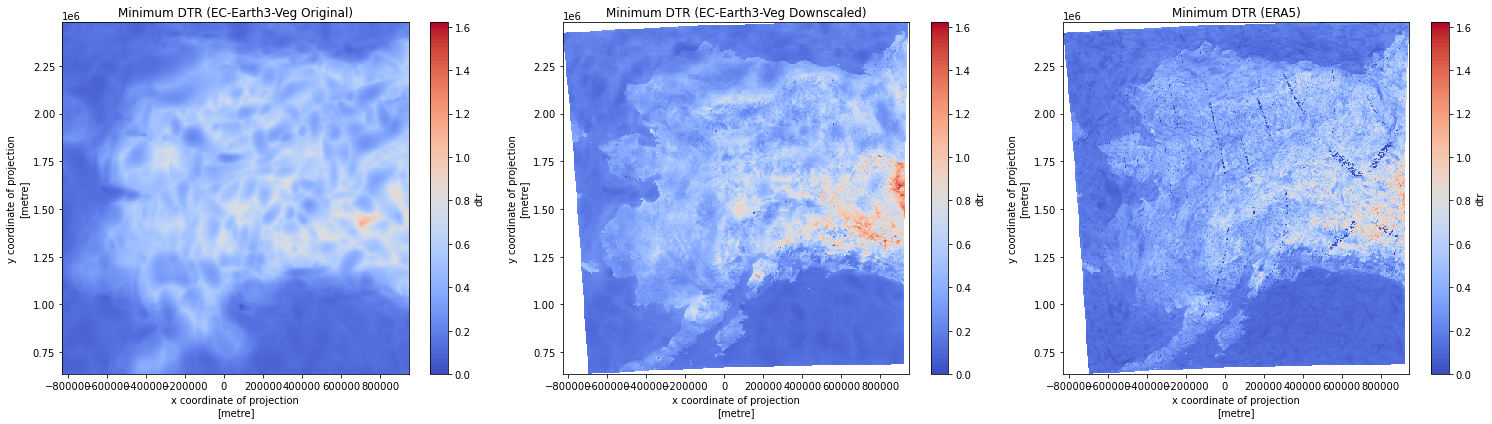

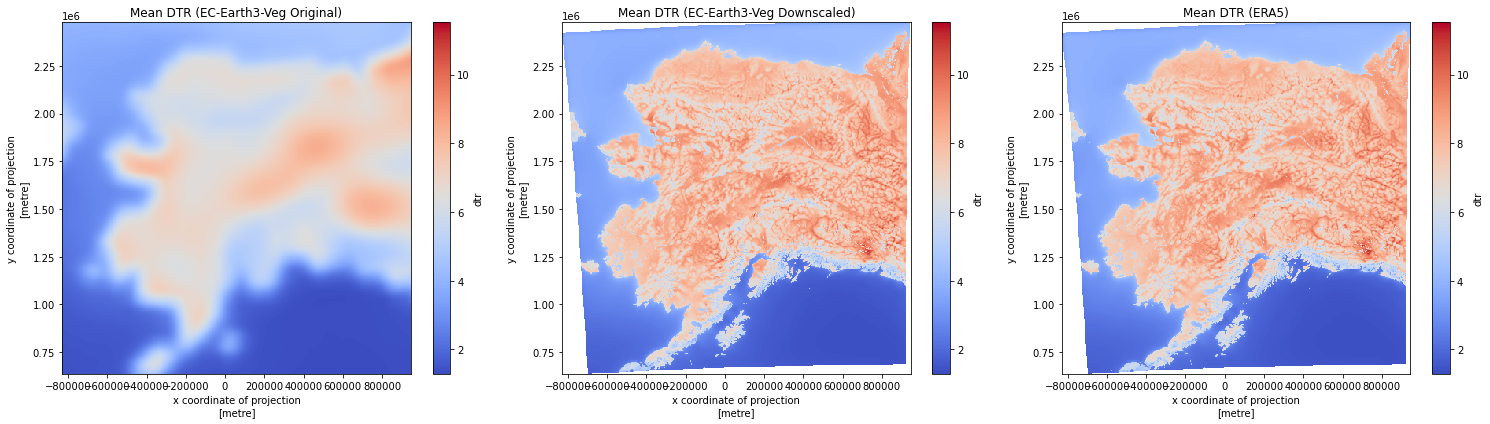

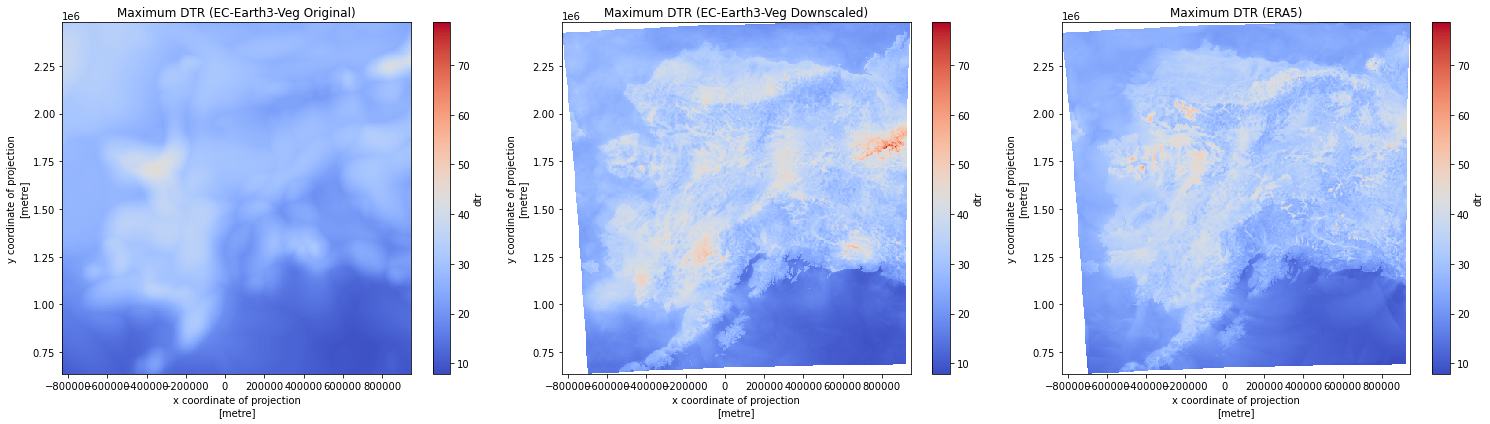

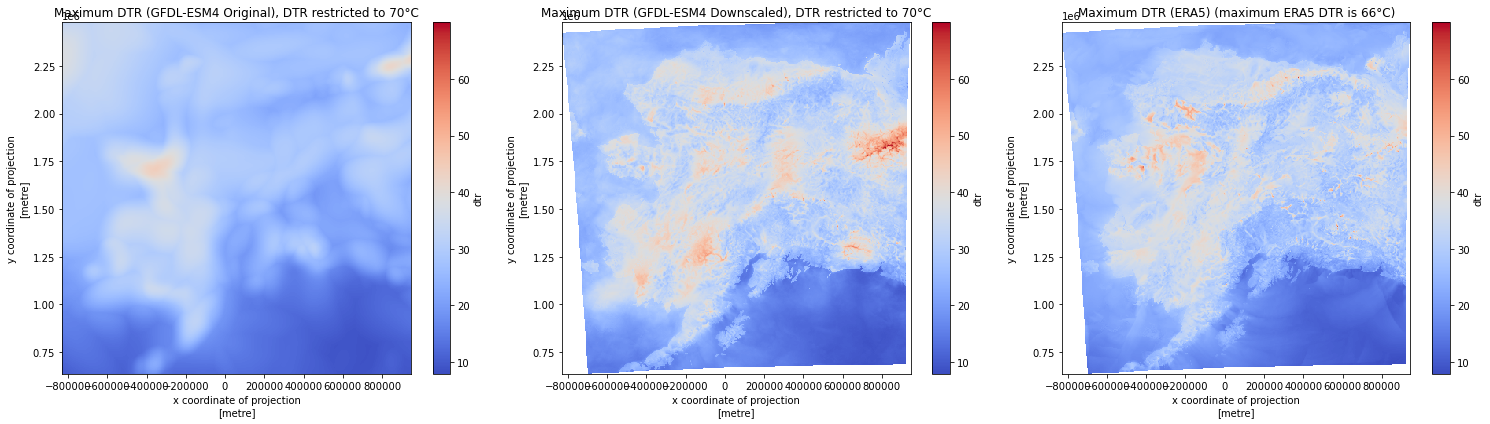

## EC-Earth3-Veg, ssp370

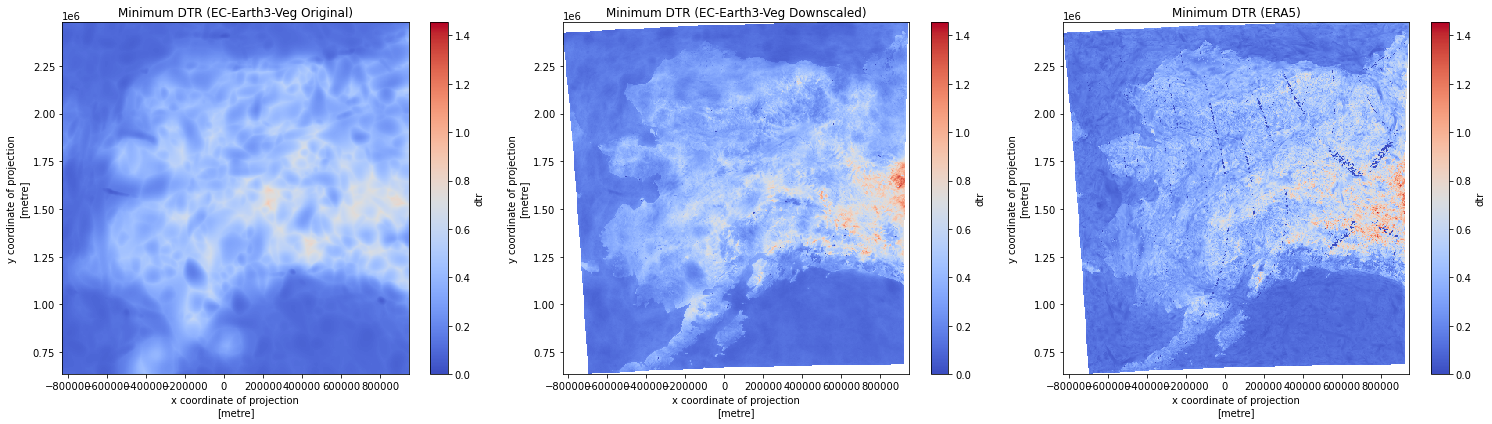

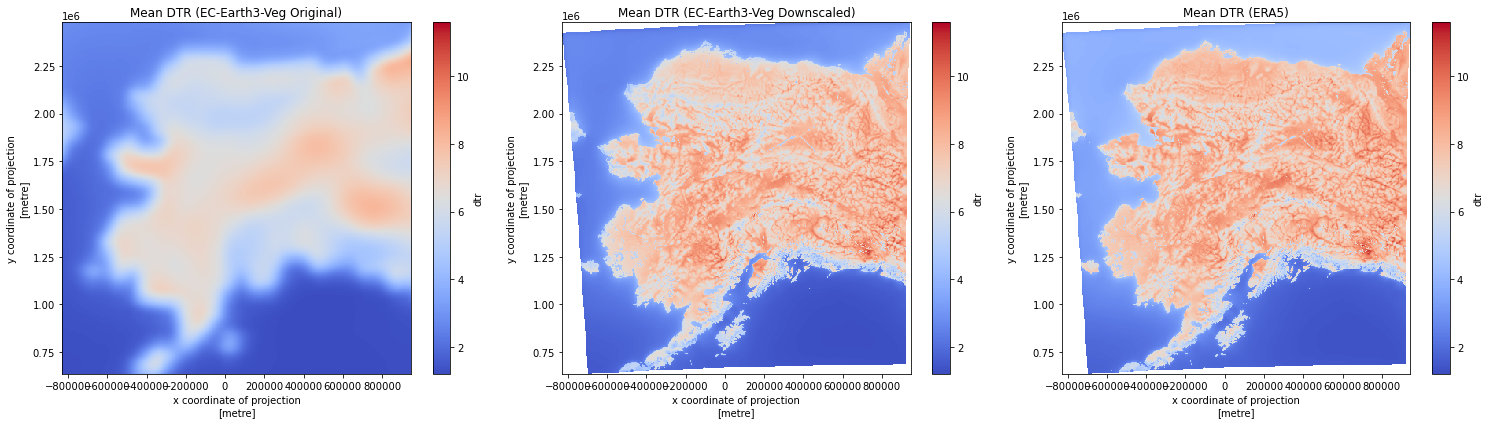

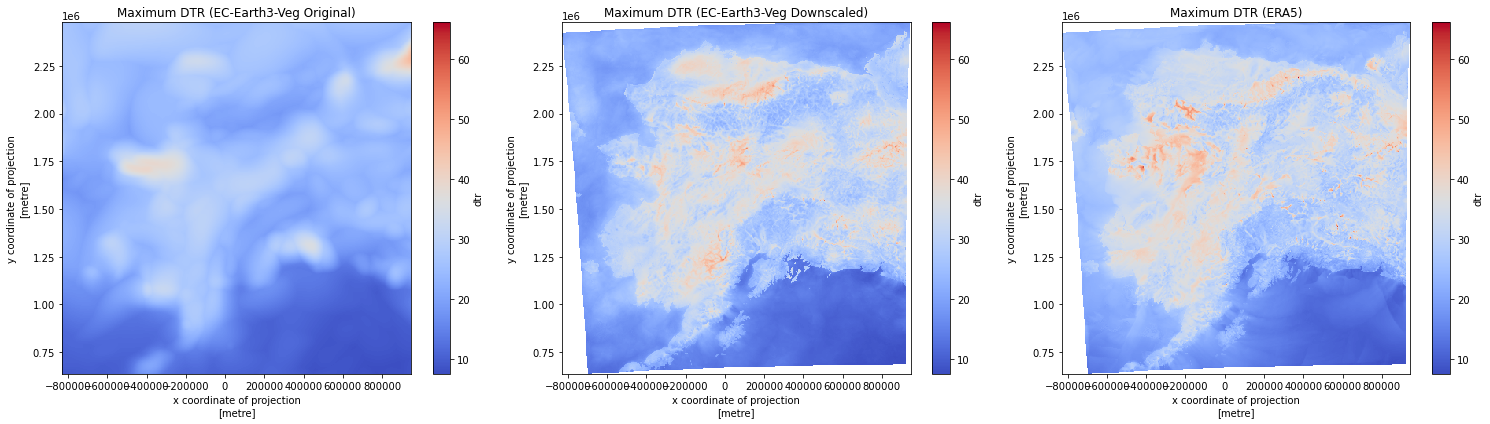

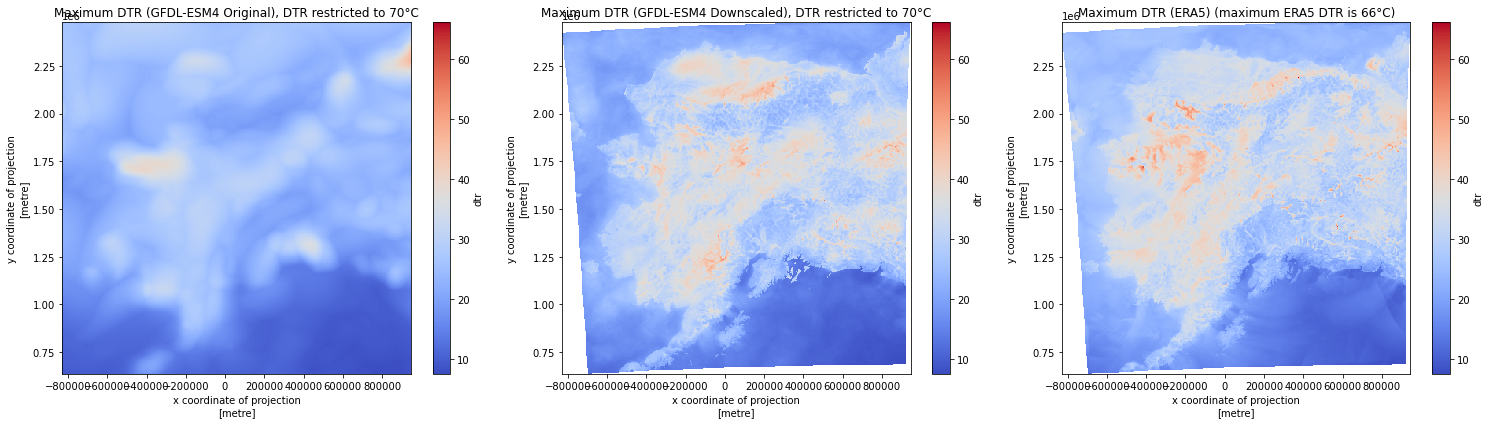

## EC-Earth3-Veg, ssp585

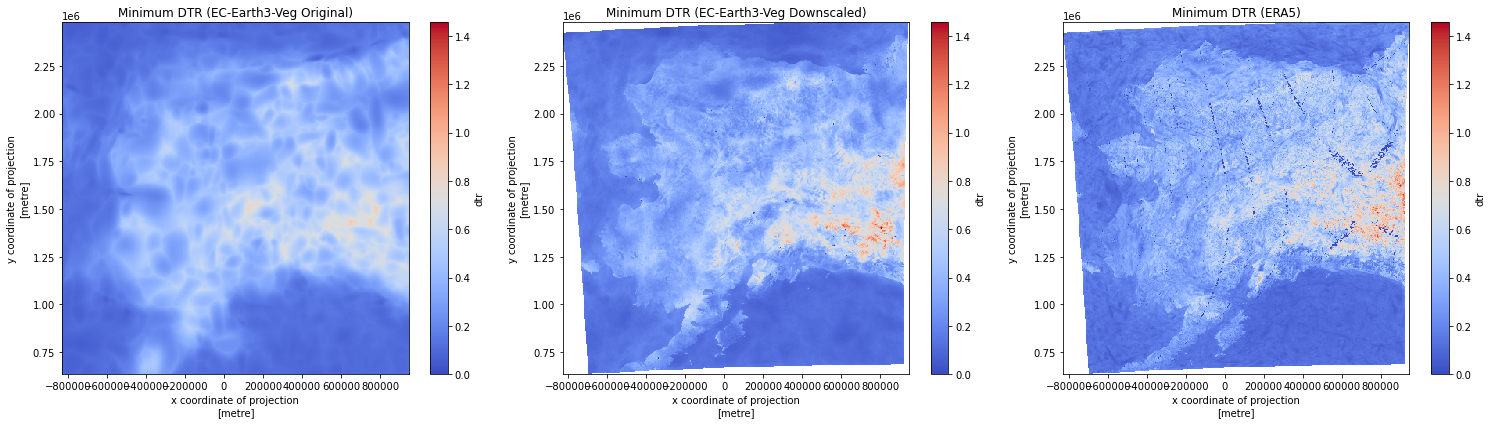

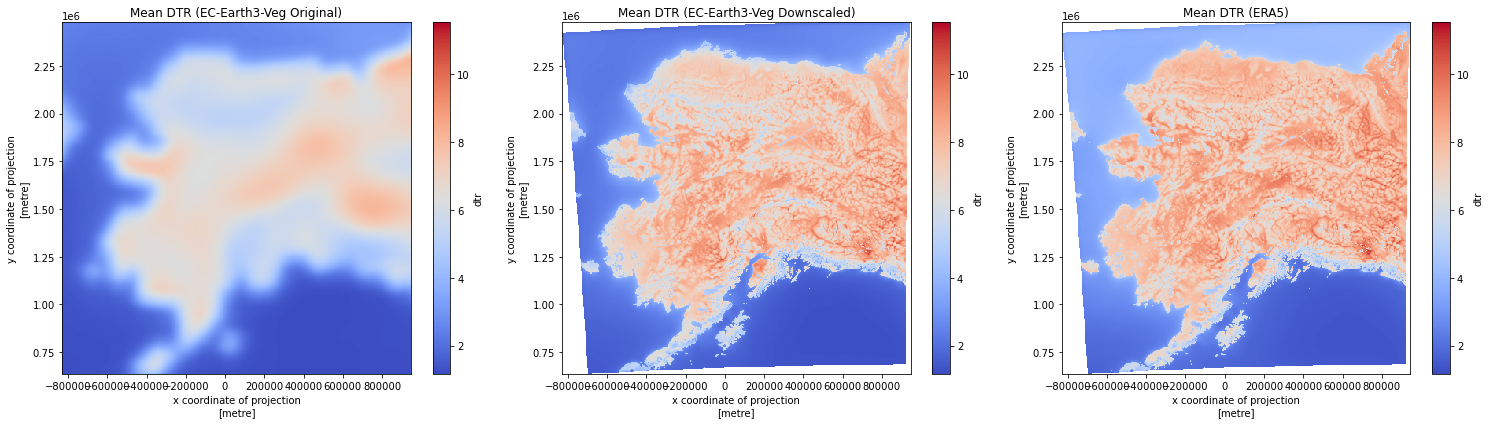

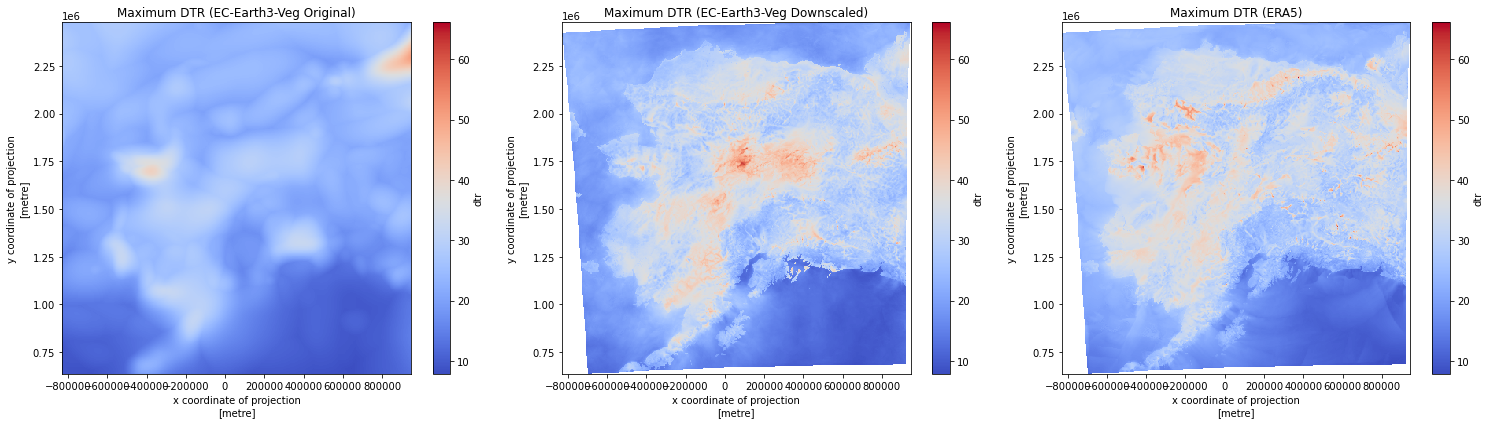

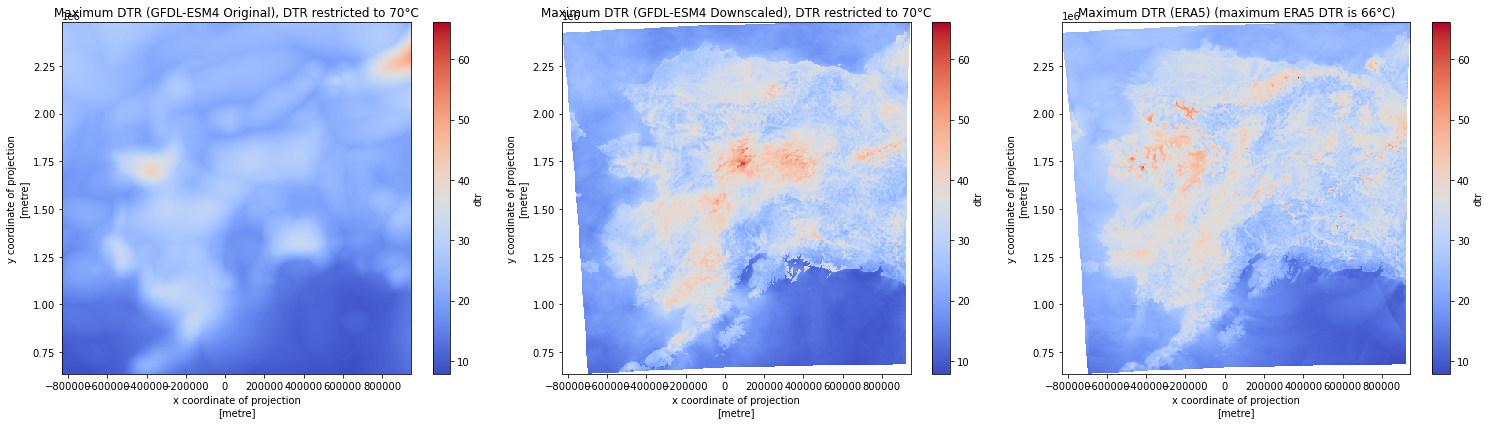

In [5]:
era5_ds = xr.open_dataset(ref_dir.joinpath("dtr_era5.zarr"))
for model in models:
    display(Markdown(f"# {model}"))
    for scenario in scenarios:
        cmip6_zarr_store = cmip6_dir.joinpath(f"dtr_{model}_{scenario}.zarr")
        cmip6_ds = xr.open_zarr(cmip6_zarr_store)

        adj_zarr_store = adj_dir.joinpath(f"dtr_{model}_{scenario}_adjusted.zarr")
        adj_ds = xr.open_zarr(adj_zarr_store)

        display(Markdown(f"## {model}, {scenario}"))
        plot_dtr(era5_ds, cmip6_ds, adj_ds, model, scenario)